In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Read in data

In [4]:
X_test = pd.read_csv("data/hw1-data/X_test.csv", header = None)
X_train = pd.read_csv("data/hw1-data/X_train.csv", header = None)
y_test = pd.read_csv("data/hw1-data/y_test.csv", header = None)
y_train = pd.read_csv("data/hw1-data/y_train.csv", header = None)

In [5]:
X_train.head(10)

,0,1,2,3,4,5,6
0,0.30957,-0.36707,0.45545,-0.200830,-0.73992,-0.80885,1
1,0.30957,0.35920,-0.11611,-0.038361,0.16625,-0.80885,1
2,-0.86291,-0.99778,-0.89551,-1.225100,-0.55868,-0.26592,1
3,-0.86291,-0.69198,-0.42787,-0.562260,-0.15997,1.09140,1
4,-0.86291,-0.92133,-0.63571,-1.251000,-0.41369,0.81993,1
5,-0.86291,-0.92133,-0.99943,-1.386400,-0.41369,0.54847,1
6,-0.86291,-0.51997,-0.42787,-0.103110,0.63746,0.81993,1
7,-0.86291,-0.77799,-0.24601,-0.882480,-0.55868,-1.35180,1
8,0.30957,0.05340,-0.42787,0.097028,0.56497,1.36290,1
9,1.48210,1.49640,1.26080,1.385000,-0.73992,-1.35180,1


In [6]:
X_train.shape

(350, 7)

In [7]:
X_trainT = X_train.transpose()
X_trainT

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,0.30957,0.309570,-0.86291,-0.86291,-0.86291,-0.86291,-0.86291,-0.86291,0.309570,1.48210,...,-0.86291,-0.86291,0.30957,-0.86291,1.48210,-0.86291,1.48210,0.30957,0.309570,1.48210
1,-0.36707,0.359200,-0.99778,-0.69198,-0.92133,-0.92133,-0.51997,-0.77799,0.053400,1.49640,...,-0.72065,-0.78755,0.34964,-1.03600,1.49640,-1.00730,1.49640,0.53121,-0.300180,1.02810
2,0.45545,-0.116110,-0.89551,-0.42787,-0.63571,-0.99943,-0.42787,-0.24601,-0.427870,1.26080,...,-0.58375,-0.42787,1.57260,-1.02540,1.26080,-0.86953,1.13090,-0.84355,0.741230,0.63731
3,-0.20083,-0.038361,-1.22510,-0.56226,-1.25100,-1.38640,-0.10311,-0.88248,0.097028,1.38500,...,-0.30325,-0.43864,0.55029,-1.18030,1.35560,-1.16270,1.97720,0.53498,0.509080,0.87993
4,-0.73992,0.166250,-0.55868,-0.15997,-0.41369,-0.41369,0.63746,-0.55868,0.564970,-0.73992,...,1.39860,1.47110,-0.77616,-0.12372,-0.92115,-0.23246,-0.73992,1.97860,0.093761,-0.77616
5,-0.80885,-0.808850,-0.26592,1.09140,0.81993,0.54847,0.81993,-1.35180,1.362900,-1.35180,...,1.63430,1.63430,0.54847,0.81993,-1.08030,0.54847,-0.26592,-0.26592,0.548470,0.81993
6,1.00000,1.000000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.000000,1.00000


# Part 1: Code to solve ridge regression problem

## Part a)

### Wrr Calculation

In [8]:
wlist = list()
dim = X_train.shape[1] # 7
n = 5000
df = list()
product = np.matmul(X_trainT,X_train)
for i in range(0,n+1):
    wrr = np.matmul(np.linalg.inv((i*np.identity(dim) + product)),np.matmul(X_trainT,y_train))
    wlist.append(wrr)

#wlist[0]

### Extract Coefficients

In [9]:
d = list()
for i in range(0,7):
    coefficients = list()
    for j in range(0,n+1):
        a = wlist[j][i]
        #print(a)
        coefficients.append(a)
    d.append(coefficients)

### SVD Method

In [10]:
u, s, v = np.linalg.svd(X_train)
s_squared = s**2
df= list()
for i in range(0,n+1):
    summation = sum(s_squared / (s_squared + (i)))
    df.append(summation)

### Plot Wrr Coefficients vs. df(lambda)

IndexError: list index out of range

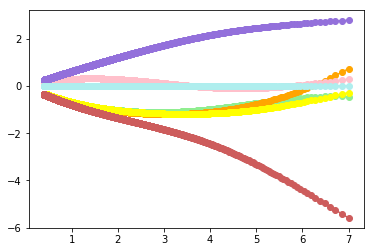

In [33]:
fig = plt.figure()
ax1 = plt.gca()
color = {0: 'lightgreen', 1: 'orange', 2: 'yellow', 3: 'indianred',4: 'pink',5: 'mediumpurple',6: 'paleturquoise'}
l = {0: 'Cylinders', 1: 'Displacement', 2: 'Horsepower', 3: 'Weight',4: 'Acceleration',5: 'Year Made', 6: 'Intercept'}
for i in range(0, dim):
        ax1.plot(df, d[i], c = color[i], marker = 'o', label = l[i])
ax1.set_xlabel("df(lambda)")
ax1.set_ylabel("WRR Coefficient")
plt.suptitle("WRR Coefficient vs. df(lambda)", y = 0.9)
ax1.legend()

## Part b) 

### The two dimensions that stand out the most over the others are 'Weight' and 'Year Made'. We can glean that these two variables, as the df increases, out lambda decreases and causes the wrr coefficent to be set to 0. Those dimensions have the most effect on the dependent variable, mpg for the car.  

## Part c)

### Run with each of 42 test cases

In [12]:
new_wlist = list()
dim = X_train.shape[1] # 7

product = np.matmul(X_trainT,X_train)
for i in range(0,51):
    wrr_new = np.matmul(np.linalg.inv((i*np.identity(dim) + product)),np.matmul(X_trainT,y_train))
    new_wlist.append(wrr_new)

In [13]:
rmse_list= list()
for i in range(0,50+1):
   rmse_list.append(np.sqrt(np.average(np.square(y_test - np.matmul(X_test, new_wlist[i])))))

### Plotting the RMSE

Text(0.5,0.9,'RMSE vs. Lambda')

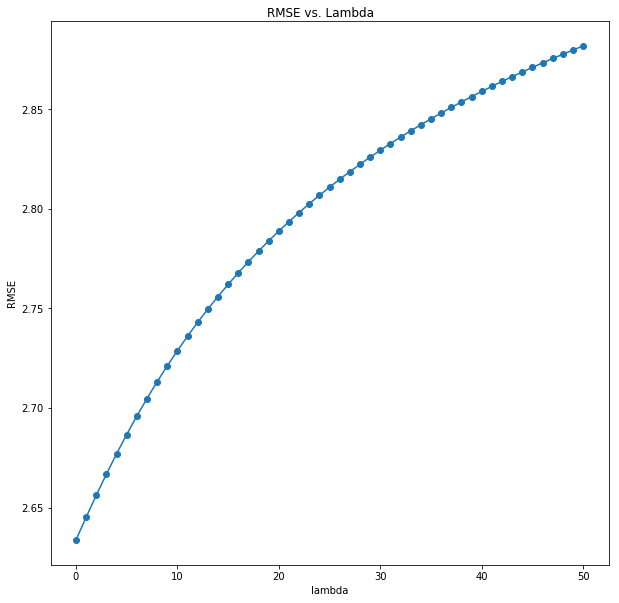

In [14]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.gca()

ax1.plot(range(0,51), rmse_list, marker = 'o')
ax1.set_xlabel("lambda")
ax1.set_ylabel("RMSE")
plt.suptitle("RMSE vs. Lambda", y = 0.9)

## Insights:
### We can see from the graph that at lower values of lambda, we experience low RMSE's. However, as the lambda increases, the RMSE increases, albeit at a decreasing rate. Since the RMSE is minimized when lambda = 0, we are effectively solving a least squares problem. Therefore, we might as well just use a least squares regression method to solve for/estimate w.

# Part 2: pth order polynomial regression model

In [15]:
xtrain1= X_train.copy()
xtrain2 = X_train.copy()

In [16]:
xtrain2.head() 

,0,1,2,3,4,5,6
0,0.30957,-0.36707,0.45545,-0.200830,-0.73992,-0.80885,1
1,0.30957,0.35920,-0.11611,-0.038361,0.16625,-0.80885,1
2,-0.86291,-0.99778,-0.89551,-1.225100,-0.55868,-0.26592,1
3,-0.86291,-0.69198,-0.42787,-0.562260,-0.15997,1.09140,1
4,-0.86291,-0.92133,-0.63571,-1.251000,-0.41369,0.81993,1


In [17]:
p2_mean = []
p2_std = []
p3_mean = []
p3_std = []



for i in range(0,6):
    p2_mean.append(np.average(np.square(xtrain1.iloc[:,i])))
    p2_std.append(np.std(np.square(xtrain1.iloc[:,i])))
    p3_mean.append(np.average(np.power(xtrain1.iloc[:,i],3)))
    p3_std.append(np.std(np.power(xtrain1.iloc[:,i],3)))

### Powerize Function

In [18]:
def powerize_2(df):
    for i in range(0,6):
        df[str(i)+'s'] = np.square(df.iloc[:,i])
        df[str(i)+ 's'] = (df[str(i)+ 's'] - np.average(df[str(i)+ 's']))/np.std(df[str(i)+ 's'])
    return df

def powerize_3(df):
    for i in range(0,6):
        df[str(i)+'c'] = np.power(df.iloc[:,i],3)
        df[str(i)+ 'c'] = (df[str(i)+ 'c'] - np.average(df[str(i)+ 'c']))/np.std(df[str(i)+ 'c']) 
    return df

xtrain2 = powerize_2(xtrain2)

In [19]:
xtrain3 = powerize_3(xtrain2.copy())

### Find Wrrs 

In [20]:
p1_wlist = list()
dim = xtrain1.shape[1] # 7
xtrain1_T = xtrain1.transpose()
product = np.matmul(xtrain1_T,xtrain1)
for i in range(0,101):
    p1_wrr = np.matmul(np.linalg.inv((i*np.identity(dim) + product)),np.matmul(xtrain1_T,y_train))
    p1_wlist.append(p1_wrr)


In [21]:
p2_wlist = list()
dim = xtrain2.shape[1] # 7
xtrain2_T = xtrain2.transpose()
product = np.matmul(xtrain2_T,xtrain2)
for i in range(0,101):
    p2_wrr = np.matmul(np.linalg.inv((i*np.identity(dim) + product)),np.matmul(xtrain2_T,y_train))
    p2_wlist.append(p2_wrr)


In [22]:
p3_wlist = list()
dim = xtrain3.shape[1] # 7
xtrain3_T = xtrain3.transpose()
product = np.matmul(xtrain3_T,xtrain3)
for i in range(0,101):
    p3_wrr = np.matmul(np.linalg.inv((i*np.identity(dim) + product)),np.matmul(xtrain3_T,y_train))
    p3_wlist.append(p3_wrr)

### Powerize Xtest data

In [23]:
X_test1= X_test.copy()
X_test2 = X_test.copy()

In [24]:
def powerize_2_test(df):
    for i in range(0,6):
        df[str(i)+'s'] = np.square(df.iloc[:,i])
        df[str(i)+ 's'] = (df[str(i)+ 's'] - p2_mean[i])/p2_std[i]
    return df

def powerize_3_test(df):
    for i in range(0,6):
        df[str(i)+'c'] = np.power(df.iloc[:,i],3)
        df[str(i)+ 'c'] = (df[str(i)+ 'c'] - p3_mean[i])/p3_std[i]
    return df


In [25]:
X_test2 = powerize_2_test(X_test2)

In [26]:
X_test3 = powerize_3_test(X_test2.copy())
X_test3.shape

(42, 19)

### RMSE Calculations

In [27]:
rmse_list1= list()
for i in range(0,100+1):
   rmse_list1.append(np.sqrt(np.average(np.square(y_test - np.matmul(X_test1, p1_wlist[i])))))

In [28]:
rmse_list2= list()
for i in range(0,100+1):
    rmse_list2.append(np.sqrt(np.average(np.square(y_test - np.matmul(X_test2, p2_wlist[i])))))

In [29]:
rmse_list3= list()
for i in range(0,100+1):
   rmse_list3.append(np.sqrt(np.average(np.square(y_test - np.matmul(X_test3, p3_wlist[i])))))

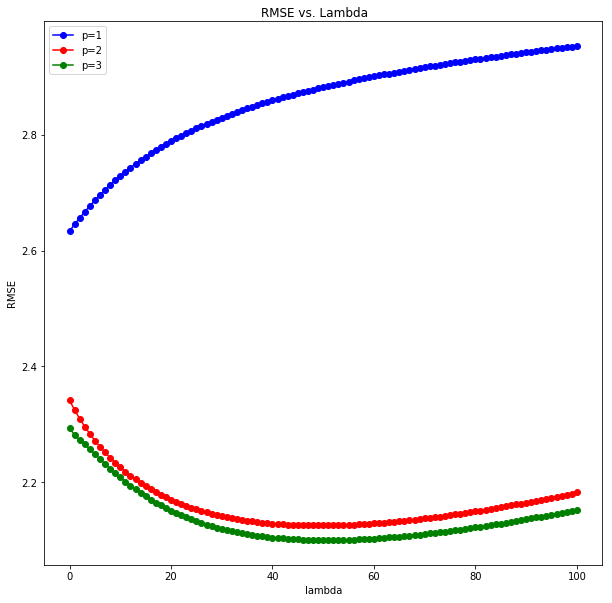

In [30]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.gca()
#color = {0: 'lightgreen', 1: 'orange', 2: 'yellow',3: 'indianred',4: 'pink',5: 'mediumpurple',6: 'paleturquoise'}

ax1.plot(range(0,101), rmse_list1, marker = 'o', c = 'b', label = "p=1")
ax1.plot(range(0,101), rmse_list2, marker = 'o', c= 'r', label = "p=2")
ax1.plot(range(0,101), rmse_list3, marker = 'o', c= 'g', label = "p=3")
ax1.set_xlabel("lambda")
ax1.set_ylabel("RMSE")
plt.suptitle("RMSE vs. Lambda", y = 0.9)
ax1.legend()


## Part 2d) We should choose the p = 3 value, which involves the transformation of X to include squared and cubic terms. The general trend of this line decreases when lambda is in between [0,40] and then slowly increases after that, which may signal potential overfitting when lambda is large and the model is more complex. Since p=3 line overall results in a RMSE measure of lambda = 0 through 100, we want to choose this one since it has the least amount of model error. The lambda for which the RMSE is minimized is when lambda = 40. 
## This differs from our previous lambda choice, which was lambda = 0.  